In [2]:
# Lets load some libraries and car data and precalculated features
library(dplyr)
library(ggplot2)
library(tidyr)
library(corrplot)

load("data/fsecure.train.RData")


Warning message:
“package ‘dplyr’ was built under R version 3.3.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”Warning message:
“package ‘tidyr’ was built under R version 3.3.2”

In [7]:
# Lets see data on car chassis type
# kori.orig is the chassis in Trafi data, 

autodata %>% 
select(., ryhma, 
       merkki, 
       mallimerkinta, 
       kuntanimi, 
       kori, 
       omamassa, 
       iskutilavuus, 
       kayttoonottovuosi,
       matkamittarilukema) %>%
head(15)

# If we want to cluster the cars what would happen if clustered by technical data (mass, kW, age, mileage)


ryhma,merkki,mallimerkinta,kori.orig,kori.est,kuntanimi,omamassa,iskutilavuus,matkamittarilukema
Henkilö,VOLKSWAGEN,5D PASSAT VARIANT 1.8 CL-351-C/263,Farmari,Farmari,Kouvola,1320,1780,355890
Henkilö,FORD,2D FIESTA 1.1-FBD/2280,NA,Viistoperä,Oulu,780,1110,NA
Henkilö,CITROEN,4D SEDAN BX 19 GTI-XBEY/2650,NA,Sedan,Helsinki,1060,1900,NA
Henkilö,RENAULT,2D CLIO HATCHBACK 1.2-CB0FCF/247,Viistoperä,Viistoperä,Pori,955,1140,108731
Henkilö,HONDA,4D ACCORD SEDAN 2.0-CL75/268,Sedan,Sedan,Tampere,1462,1990,238435
Henkilö,TOYOTA,5D COROLLA STW 1.6-ZZE121L-DWMNKW/260,Farmari,Farmari,Ähtäri,1270,1590,109030
Henkilö,TOYOTA,5D RAV4 MPV 2.2 D-4D-ALA30L-AWFGYW-4X4/256,Monikäyttö,Monikäyttö,Riihimäki,1660,2230,190310
Henkilö,NISSAN,4D PRIMERA 1.6I FANTASY-BAAP10/255,NA,Sedan,Suomussalmi,1220,1590,200334
Henkilö,HONDA,5D ACCORD TOURER 2.0-CM17/272,Monikäyttö,Monikäyttö,Oulu,1615,1990,203574
Henkilö,NISSAN,4D ALMERA 1.6 HATCHBACK-FCAN15/254,Viistoperä,Viistoperä,Kihniö,1200,1590,149883


In [8]:
# Let's cluster brand according to county, this is kind of a social clustering...
# Let's check the number of car brands

autodata %>% group_by(merkki) %>% 
  summarise(n=n()) %>% 
  arrange(-n) %>% 
  mutate(k=row_number()) 

merkki,n,k
TOYOTA,349607,1
VOLKSWAGEN,294833,2
VOLVO,211206,3
FORD,194595,4
NISSAN,166141,5
MERCEDES-BENZ,158122,6
OPEL,151679,7
AUDI,115344,8
SKODA,112569,9
PEUGEOT,104909,10


In [70]:
# Count brands on each commune; for practical (and statistical reasons we'll limit to common brands)
# first we count number of N.merkki and change brans below the limit into "other"
# then we count commune-brand combindations and spread the data 

kunnat.merkit <- autodata %>% 
  group_by(merkki) %>% 
  mutate(N.merkki=n()) %>%  
  ungroup %>% 
  mutate(merkki = ifelse(N.merkki < 300, "other", merkki)) %>%
  count(merkki, kuntanimi) %>% 
  spread(merkki, n, fill=0) 


In [71]:
# Let's check the data ...
dim(kunnat.merkit)
kunnat.merkit

[1] 315  71

kuntanimi,ADRIA,ALFA ROMEO,AUDI,BMW,BUICK,BURSTNER,CADILLAC,CAPRON,CHEVROLET,⋯,SKODA,SMART,SUBARU,SUZUKI,TALBOT,TESLA MOTORS,TOYOTA,TRIUMPH,VOLKSWAGEN,VOLVO
Äänekoski,5,14,387,291,2,5,6,2,58,⋯,340,2,71,73,5,2,1885,0,1079,722
Ähtäri,2,2,131,84,0,0,1,0,24,⋯,96,0,7,12,0,0,762,0,330,232
Akaa,9,16,335,303,9,1,21,1,80,⋯,291,8,27,41,4,1,1105,2,865,714
Alajärvi,8,8,169,199,2,0,7,2,39,⋯,149,1,18,23,2,1,801,0,593,451
Alavieska,0,1,62,41,2,1,0,0,10,⋯,62,0,3,5,0,0,195,0,208,183
Alavus,5,14,267,233,1,1,4,0,39,⋯,162,3,30,33,2,1,1348,0,739,496
Asikkala,2,8,194,135,0,1,6,2,37,⋯,171,0,67,43,0,0,585,1,567,435
Askola,5,8,98,98,1,0,3,0,36,⋯,109,3,23,25,1,0,370,2,280,223
Aura,0,2,69,104,1,0,2,2,13,⋯,106,2,6,11,0,0,310,0,301,168
Brändö,0,0,0,0,0,0,0,0,0,⋯,1,0,0,1,0,0,3,0,3,1


In [72]:
# Next we compute a distance (well, actually similarity between) the brand vectors by using 
# ordinary linear correlation [-1,1]

cor.matrix <- select(kunnat.merkit, -kuntanimi) %>% 
  cor(.,use="na.or.") 


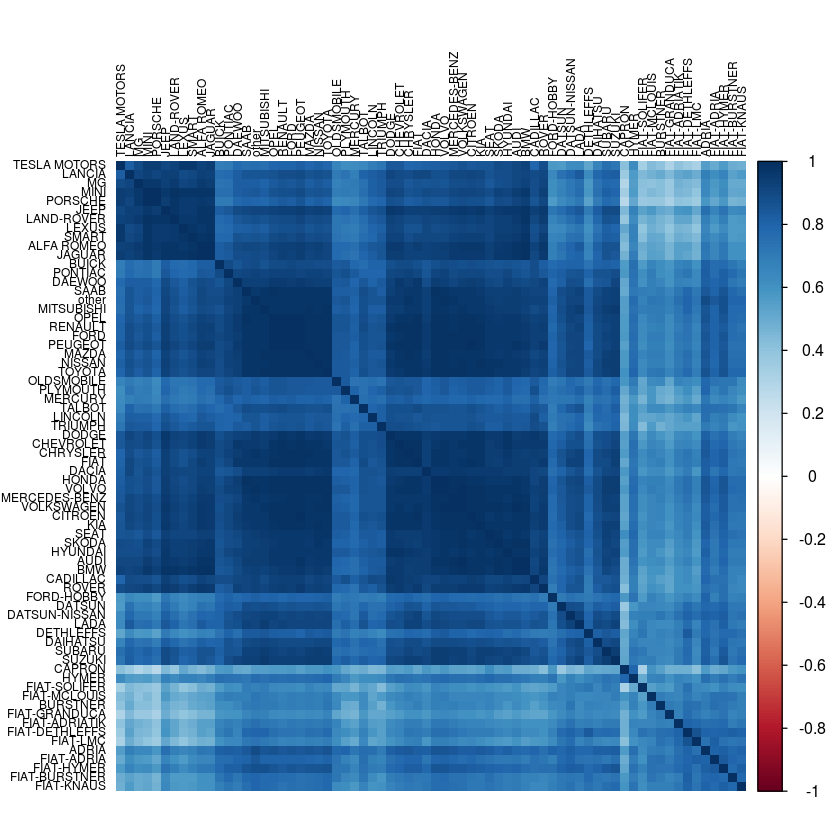

In [73]:
# This shows the correlation matrix, first, with alphabetical, then we'll change it to hclust
# check also hclust.method="single" or "ward.D", (centroid, average, ... )
corrplot(cor.matrix, order="hclust", 
         hclust.method="complete", 
         tl.cex=0.6,tl.col="black", 
         method="shade")

In [74]:
count(autodata,kuntanimi) %>% arrange(-n)

kuntanimi,n
Helsinki,204491
Espoo,115779
Vantaa,98970
Tampere,92566
Oulu,88572
Turku,77440
Jyväskylä,62174
Lahti,54966
Kuopio,51845
Kouvola,48758


In [75]:
# We'll rescale the data so that it reflects the differences of commune internal disrtribution instead of raw frequencies
# - which are obviously correlated;

# N is the number of cars in  a commune:

kunnat.merkit.dist <- kunnat.merkit
kunnat.merkit.dist$N <-select(kunnat.merkit.dist, -kuntanimi) %>% 
rowSums

kunnat.merkit.dist<- mutate_at(kunnat.merkit.dist, vars(-kuntanimi,-N), funs(./N))

head(kunnat.merkit.dist,10)

# now the vector shows the proportion of brand in a commune and is more comparable between big and small communes

kuntanimi,ADRIA,ALFA ROMEO,AUDI,BMW,BUICK,BURSTNER,CADILLAC,CAPRON,CHEVROLET,⋯,SMART,SUBARU,SUZUKI,TALBOT,TESLA MOTORS,TOYOTA,TRIUMPH,VOLKSWAGEN,VOLVO,N
Äänekoski,0.0004857198,0.0013600155,0.03759472,0.02826889,0.0001942879,0.0004857198,0.0005828638,0.0001942879,0.005634350,⋯,0.0001942879,0.006897222,0.007091510,0.0004857198,0.0001942879,0.1831164,0.0000000000,0.10481834,0.07013794,10294
Ähtäri,0.0005927682,0.0005927682,0.03882632,0.02489627,0.0000000000,0.0000000000,0.0002963841,0.0000000000,0.007113219,⋯,0.0000000000,0.002074689,0.003556609,0.0000000000,0.0000000000,0.2258447,0.0000000000,0.09780676,0.06876111,3374
Akaa,0.0009415211,0.0016738153,0.03504551,0.03169788,0.0009415211,0.0001046135,0.0021968825,0.0001046135,0.008369076,⋯,0.0008369076,0.002824563,0.004289152,0.0004184538,0.0001046135,0.1155979,0.0002092269,0.09049064,0.07469401,9559
Alajärvi,0.0014495380,0.0014495380,0.03062149,0.03605726,0.0003623845,0.0000000000,0.0012683457,0.0003623845,0.007066498,⋯,0.0001811922,0.003261460,0.004167422,0.0003623845,0.0001811922,0.1451350,0.0000000000,0.10744700,0.08171770,5519
Alavieska,0.0000000000,0.0007107321,0.04406539,0.02914001,0.0014214641,0.0007107321,0.0000000000,0.0000000000,0.007107321,⋯,0.0000000000,0.002132196,0.003553660,0.0000000000,0.0000000000,0.1385928,0.0000000000,0.14783227,0.13006397,1407
Alavus,0.0007365940,0.0020624632,0.03933412,0.03432528,0.0001473188,0.0001473188,0.0005892752,0.0000000000,0.005745433,⋯,0.0004419564,0.004419564,0.004861520,0.0002946376,0.0001473188,0.1985857,0.0000000000,0.10886859,0.07307012,6788
Asikkala,0.0004231909,0.0016927634,0.04104951,0.02856538,0.0000000000,0.0002115954,0.0012695726,0.0004231909,0.007829031,⋯,0.0000000000,0.014176894,0.009098603,0.0000000000,0.0000000000,0.1237833,0.0002115954,0.11997461,0.09204401,4726
Askola,0.0016583748,0.0026533997,0.03250415,0.03250415,0.0003316750,0.0000000000,0.0009950249,0.0000000000,0.011940299,⋯,0.0009950249,0.007628524,0.008291874,0.0003316750,0.0000000000,0.1227197,0.0006633499,0.09286899,0.07396352,3015
Aura,0.0000000000,0.0008594757,0.02965191,0.04469274,0.0004297379,0.0000000000,0.0008594757,0.0008594757,0.005586592,⋯,0.0008594757,0.002578427,0.004727116,0.0000000000,0.0000000000,0.1332187,0.0000000000,0.12935110,0.07219596,2327
Brändö,0.0000000000,0.0000000000,0.00000000,0.00000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,⋯,0.0000000000,0.000000000,0.055555556,0.0000000000,0.0000000000,0.1666667,0.0000000000,0.16666667,0.05555556,18


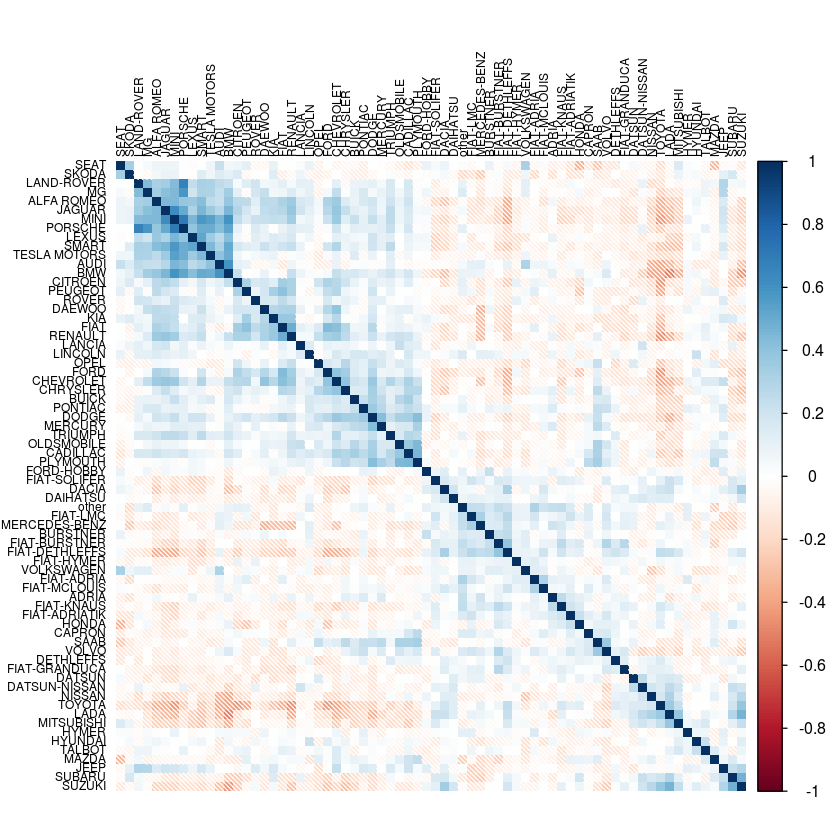

In [92]:
# Recompute correaltion, take all communes first

cor.matrix <- 
  filter(kunnat.merkit.dist, N > 1000) %>%
  select(-kuntanimi, -N) %>%
  cor(., use="na.or.") 

corrplot(cor.matrix, order="hclust", 
         hclust.method="complete", 
         tl.cex=0.6,tl.col="black", 
         method="shade")


In [83]:
# Some of the communes are really small, so they make noise to the results; set a higher limit to N to see 
# Maybe we should have a weighted / more statistically based model for this... 

count(autodata,kuntanimi) %>% arrange(-n)

# go back to previous one and change N to filter out 
# change also the cluster 

kuntanimi,n
Helsinki,204491
Espoo,115779
Vantaa,98970
Tampere,92566
Oulu,88572
Turku,77440
Jyväskylä,62174
Lahti,54966
Kuopio,51845
Kouvola,48758


In [84]:
# Factoring... well sort of, well plot the brand correlation as a scatterplot 
# with a (non-linear distance preserving) T-SNE projection 
library(tsne)

In [85]:
# Change the correlation (similarity) into a distance
dist.cor <- as.dist(1-cor.matrix)

In [93]:
# k sets the output dim (should be 2 here for plotting, bigger perplexity makes map moe global)
# try perplexity 2...20

X.cor<-tsne(dist.cor, 
            perplexity=10, 
            k=2, 
            whiten=TRUE, 
            max_iter=3000)

sigma summary: Min. : 0.1088 |1st Qu. : 0.2215 |Median : 0.2689 |Mean : 0.281 |3rd Qu. : 0.3402 |Max. : 0.4368 |
Epoch: Iteration #100 error is: 19.7715345877039
Epoch: Iteration #200 error is: 2.65734173293137
Epoch: Iteration #300 error is: 2.14600031406456
Epoch: Iteration #400 error is: 1.90640610367452
Epoch: Iteration #500 error is: 1.6760093645719
Epoch: Iteration #600 error is: 1.39756941273054
Epoch: Iteration #700 error is: 1.22522627949826
Epoch: Iteration #800 error is: 1.12951540513885
Epoch: Iteration #900 error is: 1.04859683208319
Epoch: Iteration #1000 error is: 0.99898264149143
Epoch: Iteration #1100 error is: 0.888812320852033
Epoch: Iteration #1200 error is: 0.783797023872992
Epoch: Iteration #1300 error is: 0.715619091687355
Epoch: Iteration #1400 error is: 0.692140526197948
Epoch: Iteration #1500 error is: 0.674514217761754
Epoch: Iteration #1600 error is: 0.662294561063831
Epoch: Iteration #1700 error is: 0.632389808996541
Epoch: Iteration #1800 error is: 0.61867

In [94]:
D<-data.frame(merkki=rownames(cor.matrix),X.cor)

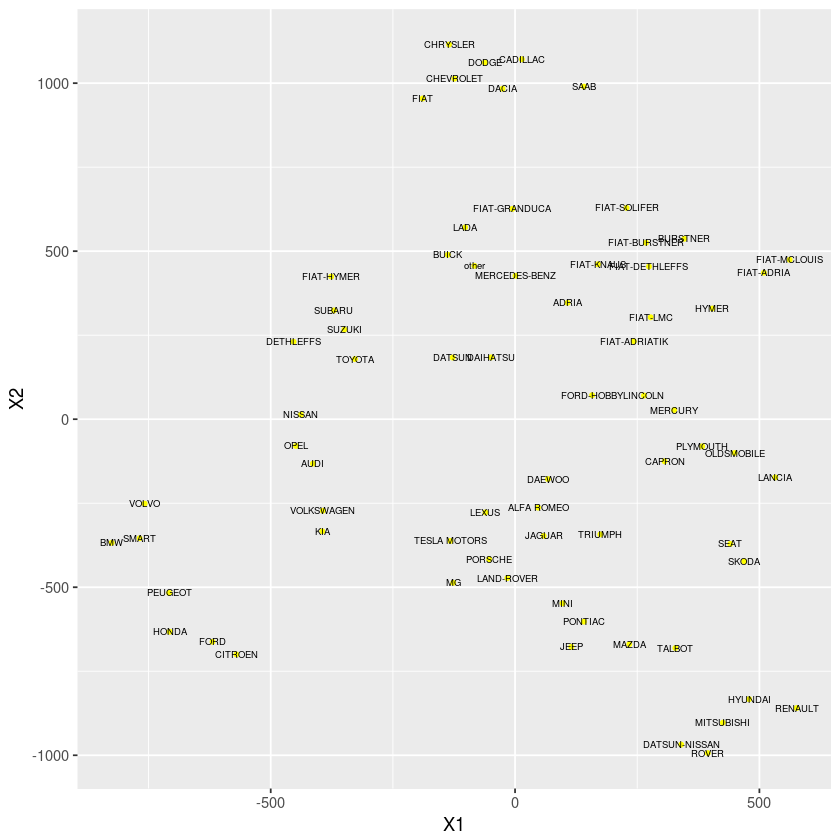

In [95]:
ggplot(D,aes(x=X1,y=X2,label=merkki))+geom_point(size=1,color="yellow")+geom_text(size=2)

In [ ]:
# You can try changeing perplexity 2...20 (bigger makes the projection more global)


# We could perhaps also in addition to brand differentiate some models - or age etc...